<a href="https://colab.research.google.com/github/saketolfa/Projects/blob/main/KYC%20Project/CustomerRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:
<h1>Identity card analysis using Image Processing and Optical Character Recognition </h1>





<h1>1.    Install some libraries </h1>



In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (10.7 MB/s)
debconf: unable to initia

In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2



<h1> 2.   Import libraries </h1>



In [ ]:
# import libraries
import numpy  as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 
import  pytesseract
from pytesseract import Output


<h1>3. Face detection </h1>

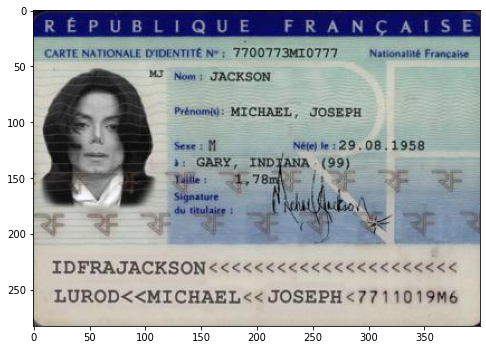

In [ ]:
# load the id card
id_card= cv2.imread('id card.jpg')

# convert to RGB color
id_card= cv2.cvtColor(id_card , cv2.COLOR_BGR2RGB)

# make a copy of the id_card
id_card_copy = id_card.copy()

#display the image
plt.figure(figsize=(8, 6))
plt.imshow(id_card)

In [ ]:
# convert to gray image 
gray_card = cv2.cvtColor(id_card , cv2.COLOR_RGB2GRAY)

There is /are 1 face(s) detected 


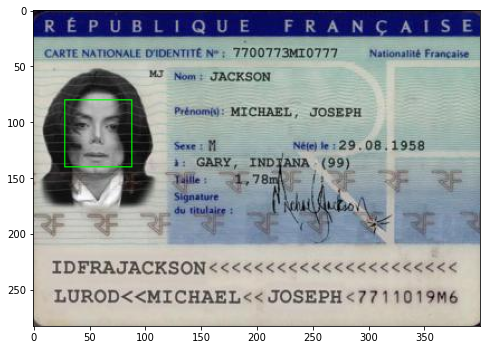

In [ ]:
# model
model = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces= model.detectMultiScale(gray_card,
                             scaleFactor=1.1,
                             minNeighbors = 5,
                             minSize=(30,30),
                             flags=cv2.CASCADE_SCALE_IMAGE)

 # we shoud only have  one face detected 
print(f'There is /are {len(faces)} face(s) detected ') 

# coordinates of detected faces
for x , y , w , h in faces:
    draw_img =cv2.rectangle(id_card_copy , (x , y ) , (x + w , y + h) ,(0,255,0) , 1)
  
#display the image
plt.figure(figsize=(8,6))
plt.imshow(draw_img)

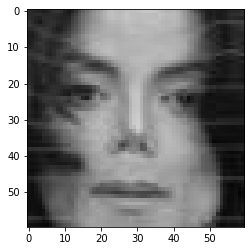

In [ ]:
# face extraction using numpy slicing
plt.imshow(id_card[faces[0][1]: faces[0][1]+faces[0][3] ,faces[0][0]:faces[0][0]+faces[0][2]])

<h1>4. Information extraction </h1>

In [ ]:
# extraction without any preprocessing
text = pytesseract.image_to_string(id_card)
print(text)

[a UE FRANCAISE
‘CARTE NATIONALE DIDENTITE N; 7700773MIO777__Nationaté Francaise
§ Nom! JACKSON

 

Prtnomiy: MICHAEL, JOSEPH

Sexe: H Néf ie: 29.08, 1958
a: GARY, INDJANA (99)

 

IDFRAJACKSON<<<<<<<<<cc<ccecccecce
LUROD<<MICHAEL<< JOSEPH<7711019M6



In [ ]:
# preprocessing function
def preprocessing(image):
    
    # convert to gray 
    image=cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
    # filtering 
    image = cv2.medianBlur(image,1)
    # thresholding
    ret , image= cv2.threshold(image , 0 , 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print('threshold = ' ,ret)
    
    return image
    

In [ ]:
new_card= preprocessing(id_card)

threshold =  112.0


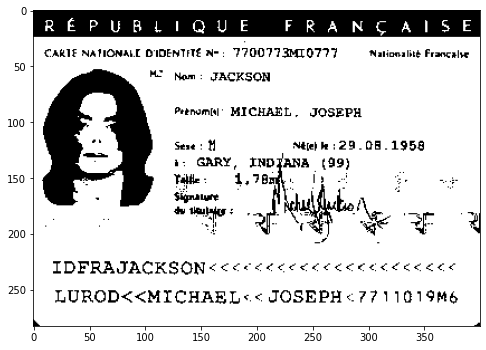

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(new_card, 'gray')

In [ ]:
text = pytesseract.image_to_string(new_card)
print(text)

REPUBLIQUE FRANCAISE
‘CARIE NATIONALE DIDENTTE N= 7700773MTO777 Nationale Fancale

 

ME Nom: JACKSON

Prenomis MICHAEL, JOSEPH

see t tee: 29.08.1958
H GARY, ENDJANA (99)

Yate

‘Sigrare

wigs

 

IDFRAJACKSON<<cecececcccececenc cee
LUROD<<MICHAEL«< JOSEPH <7711019M6



**Resume:</br>**
Even after using  the preprocessing, we still have  errors. </br>
We can  try to cut the image into several pieces and treat each piece separately.</br>
That's what we're going to  do 


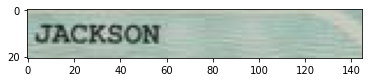

In [ ]:
name= id_card[49:70 , 155:300]
plt.imshow(name)

In [ ]:
name= pytesseract.image_to_string(preprocessing(name))
print(name)


threshold =  131.0
JACKSON



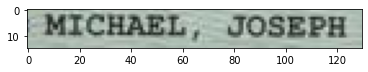

In [ ]:
last_name= id_card[85:100 , 170:300]
plt.imshow(last_name)

In [ ]:
last_name= pytesseract.image_to_string(preprocessing(last_name))
print(last_name)

threshold =  130.0
MICHAEL, JOSEPA



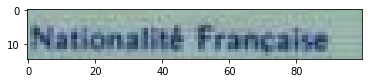

In [ ]:
nationality = id_card[30:45, 300:400]
plt.imshow(nationality)

In [ ]:
nationality = pytesseract.image_to_string(nationality)
print(nationality)

Nationalité Francaise



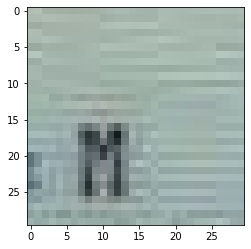

In [ ]:
sexe = id_card[100:130, 150:180]
plt.imshow(sexe)

In [ ]:
sexe= pytesseract.image_to_string(preprocessing(sexe))
print(sexe)

threshold =  134.0



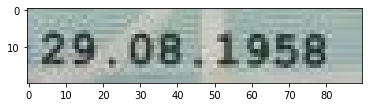

In [ ]:
dn = id_card[110:130, 270:360]
plt.imshow(dn)

In [ ]:
dn= pytesseract.image_to_string(preprocessing(dn))
print(dn)

threshold =  126.0
29.08.1958



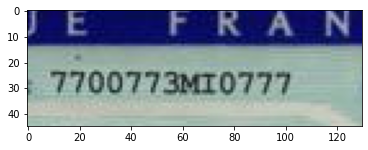

In [ ]:
card_num = id_card[10:55, 170:300]
plt.imshow(card_num)

In [ ]:
card_num= pytesseract.image_to_string(preprocessing(card_num))
print(card_num)

threshold =  103.0
7700773620777



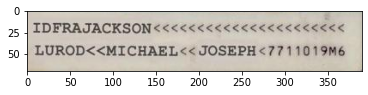

In [ ]:
id = id_card[210:280, 10:400]
plt.imshow(id)

In [ ]:
id= pytesseract.image_to_string(preprocessing(id))
print(id)

threshold =  149.0
IDFRAJACKSON £<<< << C646 66 << CCK KE
LUROD<<MICHAEL<< JOSEPH<7711019M6



In [ ]:
print('name: ',name , 
      '\n last name ', last_name,
       '\n nationality: ' , nationality , 
      '\n sexe: ' , sexe ,
       '\n date of birth: ' , dn ,
        '\n num card : ' , card_num,
         '\n id card: \n' , id)

name:  JACKSON
 
 last name  MICHAEL, JOSEPA
 
 nationality:  Nationalité Francaise
 
 sexe:   
 date of birth:  29.08.1958
 
 num card :  7700773620777
 
 id card: 
 IDFRAJACKSON £<<< << C646 66 << CCK KE
LUROD<<MICHAEL<< JOSEPH<7711019M6



**Resume:</br>**
We cut the image by using  fixed coordinates. Our problem here is when we scan  the different identity card , these coordinates may therefore not be good from one image to another.